# Kullback-Leibler Divergence Drift Detector

$$KL(p(x) ‖ q(x)) = \sum_{x∈X}p(x) log (\frac{p(x)}{q(x)}) $$

## Probability Mass Function
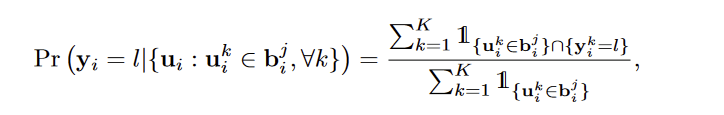

## Proposed KL-divergence-based similarity metricProposed KL-divergence-based similarity metric

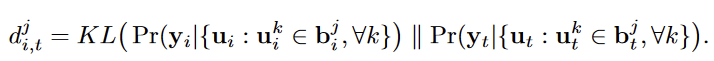
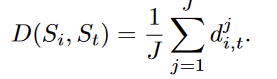
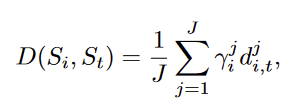
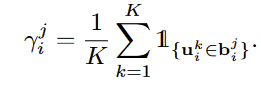


## Decision rule using a threshold valueDecision rule using a threshold value
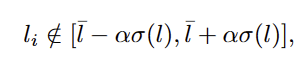


https://github.com/statsmodels/statsmodels/

In [31]:
import pandas as pd
import math
import numpy as np 
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C://Users/vikas/Documents/KL_Test.xlsx.csv")
df.head()

,X1,X2
0,0,0.0
1,0,1.0
2,0,2.0
3,0,NaN
4,0,NaN


In [7]:
X1 = list(df["X1"].values)
X2 = list((df["X2"].dropna().values))
classes = list(df["X1"].unique())
X1, X2,classes

([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
 [0.0, 1.0, 2.0],
 [0, 1, 2])

In [8]:
def proba(xi, X):
    proba_sum = 0
    
    for x_i in X:
        if xi == x_i:
            proba_sum += 1
    return round(proba_sum/len(X), 2)

In [9]:
for i in classes:
    print(proba(i, X2))

0.33
0.33
0.33


In [10]:
def kl_divergence(classes = [], X1 =[], X2 = [], p_x = 0, q_x = 0, ls = 1):
    summ = 0
    if ls == 1:
        for i in classes:
            p_x = proba(i, X1)
            q_x = proba(i, X2)

            summ += p_x * (math.log(round(p_x / q_x, 3)))
    else :
        summ = p_x * (math.log(round(p_x / q_x, 3)))

    return summ

In [11]:
print(kl_divergence(X2, X1, classes))

0.09557990467845032


In [12]:
def binning(X, bins):
    per_bin = round(len(X)/bins)
    # per_bin = round(len(X) / bins) 
    # per_bin = 3
    
    bin_list = []
    full  = 0
    flag = 0
    itr = 0
    
    for i in range(bins):
        temp_list = []
        for j in range(0,per_bin):
            full += 1
            itr+=1
            if full <= len(X):
                temp_list.append(X[itr])
            else:
                flag = 1
                break
        if flag == 0:
            bin_list.append(temp_list)
        else:
            # if temp_list != []:
            bin_list.append(temp_list)
            break
    
    # for i in range(len(X)-1):
    #     temp_list = []
    #     for j in range(0,per_bin):
    #         full += 1
    #         if full <= len(X):
    #             temp_list.append(X[i])
    #         else:
    #             flag = 1
    #             break
    #         i+=1
    #     if flag == 0:
    #         bin_list.append(temp_list)
    #     else:
    #         # if temp_list != []:
    #         bin_list.append(temp_list)
    #         break
    return bin_list

In [13]:
print(binning(X1, bins = 2)), print(len(binning(X1, bins = 24)))

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]]
24


(None, None)

In [14]:
def pmf(bin_list, classes):
    bins = len(bin_list)
    # prob_class_list = []
    num = 0
    den = 0
    final_list = []
    
    for cl in classes:
        prob_class_list = []
        for binn in bin_list:
            for i in range(len(binn)):
                if binn[i] == cl:
                    num += 1
            prob_class_list.append(round(num/len(binn), 2))
            num = 0
        final_list.append(prob_class_list)
    
    return final_list

In [15]:
print(pmf(binning(X1, bins = 2), classes))

[[0.67, 0.0], [0.33, 0.67], [0.0, 0.33]]


In [16]:
for binn in binning(X1, bins = 2):
    print(binn)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2]


In [17]:
p_x = [[0.67, 0.30], [0.33, 0.67], [0.40, 0.33]]
q_x = [[0.60, 0.40], [0.33, 0.37], [0.42, 0.24]]

In [18]:
p_x[1][1]

0.67

In [19]:
len(p_x[0])-1

1

In [20]:
kl_divergence(p_x = 0.33, q_x = 0.24, ls = 0)

0.10508973126911642

In [21]:
summ = 0
bins = len(p_x[0])
curr_bin = 0
flag = 0
sum_list = []

for i in range(0,bins):
    summ = 0
    for j in range(len(p_x)):
        res = kl_divergence(p_x = p_x[j][i], q_x = q_x[j][i], ls = 0)
        summ += res
    sum_list.append(summ)
    print(summ)
    print("-"*50)
        # print(p_x[j][i])
        # print(q_x[j][i])

# for p_bin, q_bin in zip(p_x, q_x):
#     summ = 0
#     for index,(px, qx) in enumerate(zip(p_bin, q_bin)):
        
#         res = kl_divergence(p_x = px, q_x = qx, ls = 0)
#         summ += res
#         print(summ)
#         print("-"*50)

0.054457070782023935
--------------------------------------------------
0.4166841593974373
--------------------------------------------------


In [22]:
sum_list

[0.054457070782023935, 0.4166841593974373]

In [23]:
def decision_rule(sum_list, X1, X2):
    list1 = binning(X1, bins = 2)
    bins = len(binning(X1, bins = 2))
    gamma_list = []
    decision_rule = 0
    
    for binn in list1:
        gamma = 0
        gamma = len(binn)/len(X1)
        gamma_list.append(gamma)

    for gamma, summ in zip(gamma_list, sum_list):
        decision_rule += gamma * summ
    
    decision_rule = decision_rule / bins
    return decision_rule

In [24]:
print(decision_rule(sum_list, X1, X2))

0.1130738952430707


In [25]:
value_list = []
index_list = []

for i in range(100):
    value_list.append(round(random.randint(0,1), 2))
    index_list.append(i)

In [29]:
lowess = sm.nonparametric.lowess

temp_lowess = lowess(endog=value_list, exog=index_list)
temp_lowess = pd.Series(temp_lowess[:, 1], index=index_list)

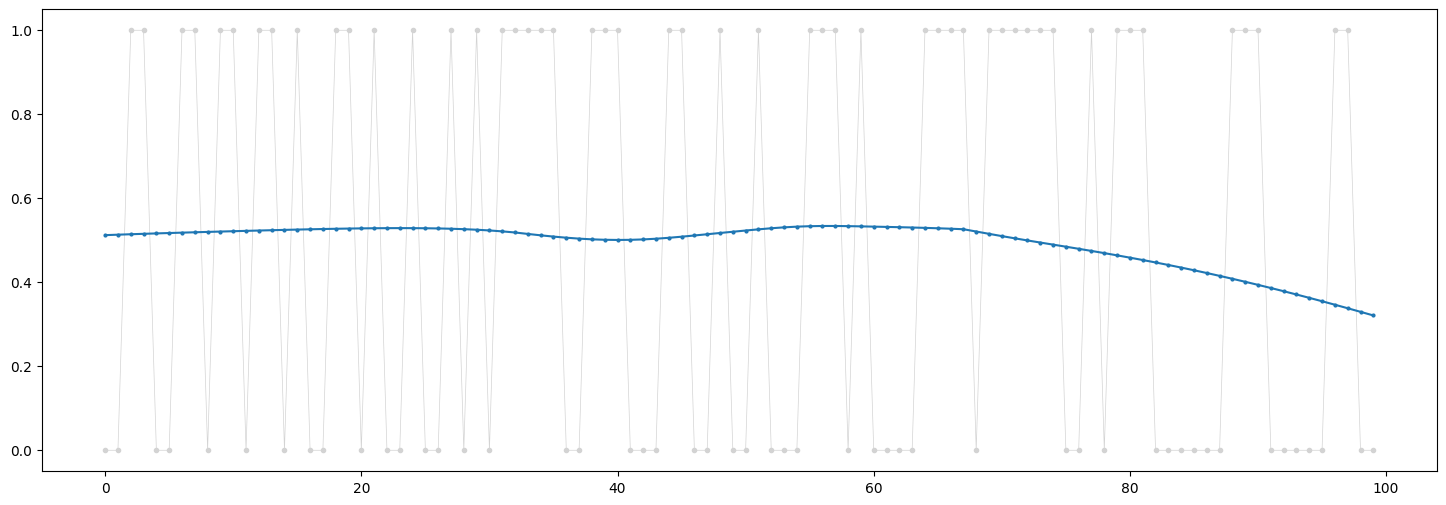

In [32]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(
    value_list,
    marker=".",
    linestyle="-",
    linewidth=0.5,
    label="Daily Data",
    color="lightgrey",
)

ax.plot(
    temp_lowess,
    marker="o",
    markersize=2,
    linestyle="-",
    label="frac = 2/3 (default)",
)

In [44]:
def critical_point(temp_lowess, alpha = 0.1):
    mean = 0
    for value in temp_lowess:
        mean += value
    mean = round(mean / len(temp_lowess))
    std_dev = 0
    
    summ = 0
    
    for value in temp_lowess:
        summ += round((value - mean) ** 2, 5)
    std_dev = math.sqrt(summ/len(temp_lowess))
    
    lower_bound = round(mean - alpha * std_dev, 5)
    upper_bound = round(mean + alpha * std_dev, 5)    
    
    return  lower_bound, upper_bound

**Note:** Higher the value of alpha, less will be the range, leading to more false negatives

Lower the value of alpha, more will be the range, leading to more flase positives.

In [45]:
print(critical_point(temp_lowess, alpha = 0.01))

(-0.00495, 0.00495)
